In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:/Users/rishitha/Desktop/YouthUnemploy.csv')
df.head()

,Rank,Country,Unemployement
0,1,French Polynesia,56.7
1,2,Kosovo,55.4
2,3,South Africa,53.4
3,4,Libya,48.7
4,5,Eswatini,47.1


In [4]:
df.tail()

,Rank,Country,Unemployement
176,177,Cambodia,1.1
177,178,Guinea,1.0
178,179,Madagascar,1.0
179,180,Niger,0.7
180,181,Qatar,0.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           181 non-null    int64  
 1   Country        181 non-null    object 
 2   Unemployement  181 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [6]:
df.columns

Index(['Rank', 'Country', 'Unemployement'], dtype='object')

In [7]:
print(df.isna().sum())

Rank             0
Country          0
Unemployement    0
dtype: int64


In [8]:
print(df.groupby('Country').mean()) # computes the average unemployment rate for each country in the dataset

              Rank  Unemployement
Country                          
Afghanistan   75.0           17.6
Albania       27.0           31.9
Algeria       13.0           39.3
Angola        12.0           39.4
Argentina     54.0           23.7
...            ...            ...
Vietnam      154.0            6.9
West Bank      9.0           42.2
Yemen         50.0           24.5
Zambia        52.0           24.0
Zimbabwe      83.0           16.5

[181 rows x 2 columns]


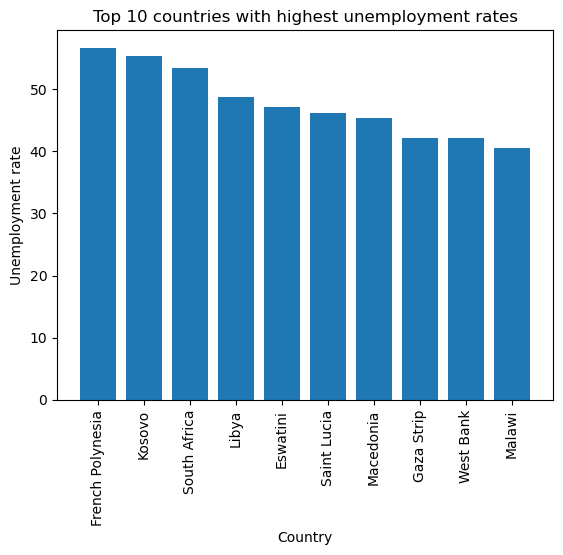

In [9]:
top10 = df.nlargest(10, 'Unemployement') # select top 10 countries with highest unemployment rates

plt.bar(top10['Country'], top10['Unemployement'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Unemployment rate')
plt.title('Top 10 countries with highest unemployment rates')
plt.show()

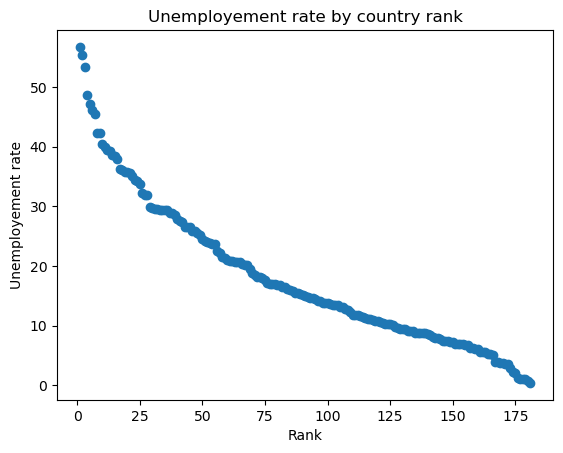

In [10]:
plt.scatter(df['Rank'], df['Unemployement'])
plt.xlabel('Rank')
plt.ylabel('Unemployement rate')
plt.title('Unemployement rate by country rank')
plt.show()

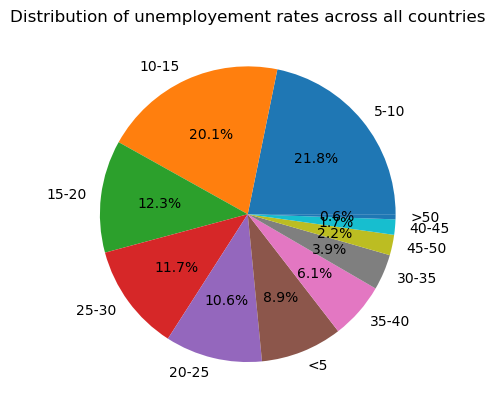

In [11]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55] # define bins for unemployment rates
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '>50'] # define labels for bins
df['Unemployement group'] = pd.cut(df['Unemployement'], bins=bins, labels=labels) # create a new column with the unemployment rate group for each country

counts = df['Unemployement group'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of unemployement rates across all countries')
plt.show()

In [12]:
from scipy.stats import ttest_1samp


# Calculate the sample mean and standard deviation
sample_mean = df['Unemployement'].mean()
sample_std = df['Unemployement'].std()

# Set the null hypothesis mean
null_mean = 0.075

# Calculate the t-statistic and p-value
t_stat, p_val = ttest_1samp(df['Unemployement'], null_mean)

# Print the results
print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample standard deviation: {sample_std:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("The null hypothesis can be rejected.")
else:
    print("The null hypothesis cannot be rejected.")

Sample mean: 18.1514
Sample standard deviation: 12.2331
T-statistic: 19.8798
P-value: 0.0000
The null hypothesis can be rejected.


In [13]:
from sklearn.linear_model import LinearRegression
X = df[['Rank']]
y = df[['Unemployement']]

model = LinearRegression()
model.fit(X, y)

# Predict youth unemployment rates for the top 10 countries with highest rank
top10 = df.nlargest(10, 'Rank')
X_top10 = top10[['Rank']]
y_pred = model.predict(X_top10)

# Print predicted values
print(y_pred)

[[-1.86980754]
 [-1.64734989]
 [-1.42489223]
 [-1.20243458]
 [-0.97997693]
 [-0.75751928]
 [-0.53506162]
 [-0.31260397]
 [-0.09014632]
 [ 0.13231134]]


C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

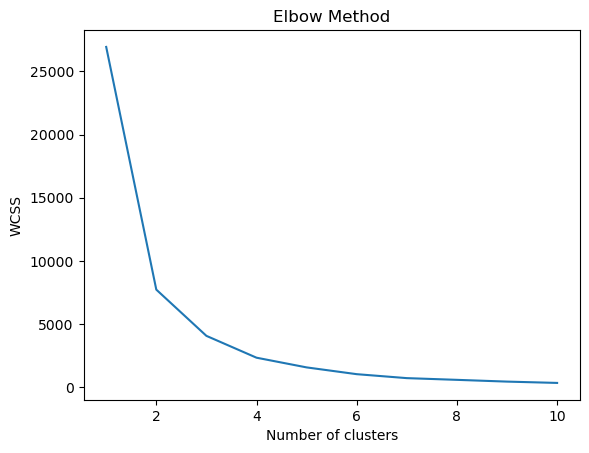

C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


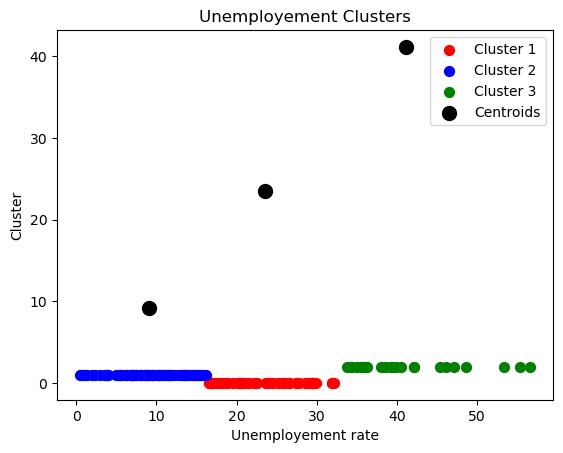

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# select the feature(s) to cluster on
X = df[['Unemployement']]

# determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# plot the results
plt.scatter(X.iloc[y_kmeans == 0], y_kmeans[y_kmeans == 0], s=50, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1], y_kmeans[y_kmeans == 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2], y_kmeans[y_kmeans == 2], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s=100, c='black', label='Centroids')
plt.title('Unemployement Clusters')
plt.xlabel('Unemployement rate')
plt.ylabel('Cluster')
plt.legend()
plt.show()

C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rishitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


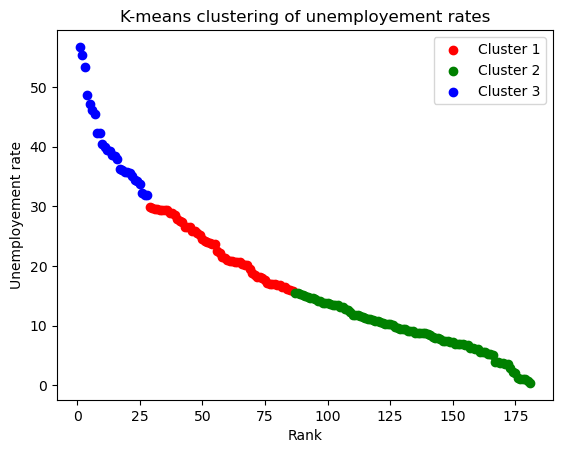

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the data
X = df[['Unemployement']]

# Define the number of clusters
k = 3

# Create the model
model = KMeans(n_clusters=k)
model.fit(X)

# Get the cluster labels
labels = model.labels_

# Add the labels to the data frame
df['Cluster'] = labels

# Plot the clusters
colors = ['r', 'g', 'b']
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Rank'], cluster_data['Unemployement'], c=colors[i], label='Cluster {}'.format(i+1))

plt.xlabel('Rank')
plt.ylabel('Unemployement rate')
plt.title('K-means clustering of unemployement rates')
plt.legend()
plt.show()

C:\Users\rishitha\AppData\Local\Temp\ipykernel_23712\2037025894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


<Axes: >

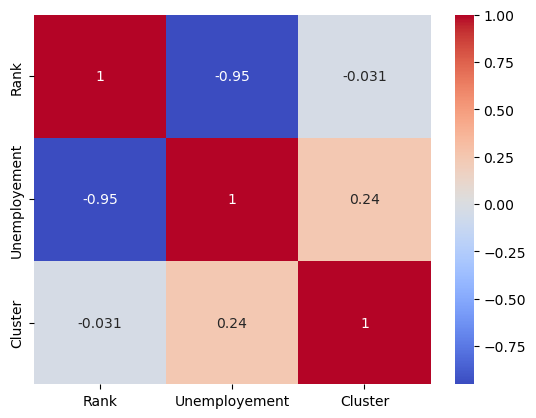

In [16]:
corr_matrix = df.corr(method='pearson')

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [17]:
unemp_mean = df['Unemployement'].mean()
unemp_median = df['Unemployement'].median()
unemp_mode = df['Unemployement'].mode().values
unemp_std = df['Unemployement'].std()

print('Unemployement mean:', unemp_mean)
print('Unemployement median:', unemp_median)
print('Unemployement mode:', unemp_mode)
print('Unemployement standard deviation:', unemp_std)

Unemployement mean: 18.151381215469613
Unemployement median: 14.9
Unemployement mode: [6.9 8.7]
Unemployement standard deviation: 12.233145356116198
